<a href="https://colab.research.google.com/github/MiskirB/B5W6-Intelligent-Complaint-Analysis/blob/main/01_EDA_and_Cleaning_B5W6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

file_path = "/content/drive/MyDrive/B5W6-Intelligent-Complaint-Analysis/data/complaints.csv"
df = pd.read_csv(file_path)

print(df.shape)
df.head()


/tmp/ipython-input-2-3017226269.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


(9609797, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


/tmp/ipython-input-3-3895272097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Product", data=df, order=df["Product"].value_counts().index, palette='viridis')


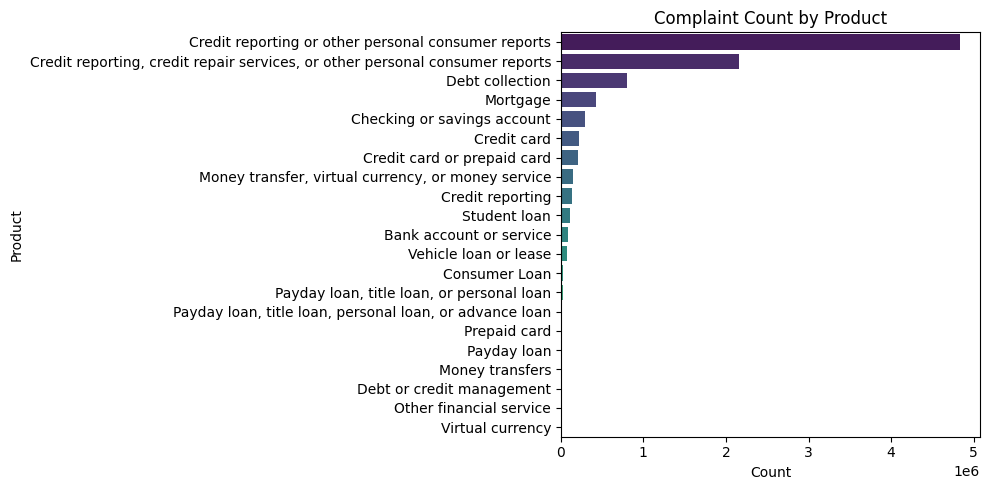

✅ Saved product distribution plot to Drive.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(y="Product", data=df, order=df["Product"].value_counts().index, palette='viridis')
plt.title("Complaint Count by Product")
plt.xlabel("Count")
plt.ylabel("Product")
plt.tight_layout()

# Save figure to Drive
plot_path = "/content/drive/MyDrive/B5W6-Intelligent-Complaint-Analysis/reports/product_distribution.png"
plt.savefig(plot_path)
plt.show()

print("✅ Saved product distribution plot to Drive.")


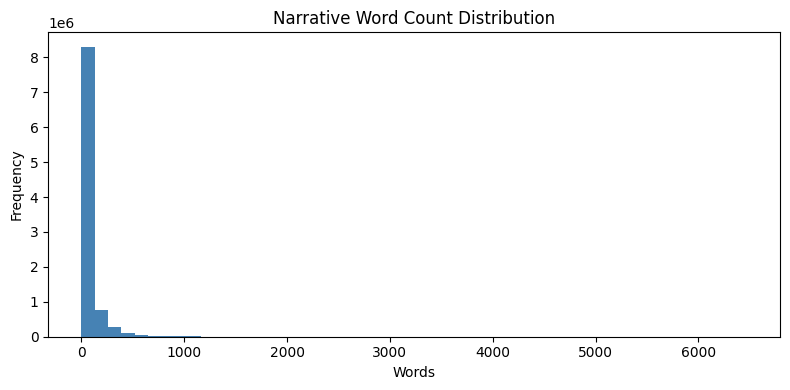

✅ Saved narrative length plot to Drive.


In [4]:
df["narrative_length"] = df["Consumer complaint narrative"].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 4))
plt.hist(df["narrative_length"], bins=50, color="steelblue")
plt.title("Narrative Word Count Distribution")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()

# Save figure to Drive
length_plot_path = "/content/drive/MyDrive/B5W6-Intelligent-Complaint-Analysis/reports/narrative_wordcount.png"
plt.savefig(length_plot_path)
plt.show()

print("✅ Saved narrative length plot to Drive.")


In [5]:
import re

# Step 1: Filter to 5 key products
relevant_products = [
    "Credit card",
    "Personal loan",
    "Buy Now, Pay Later",
    "Savings account",
    "Money transfer, virtual currency, or money service"
]

df_filtered = df[df["Product"].isin(relevant_products)].copy()
df_filtered = df_filtered[df_filtered["Consumer complaint narrative"].notnull()]

# Step 2: Clean the narrative
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n|\r', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text.strip()

df_filtered["cleaned_narrative"] = df_filtered["Consumer complaint narrative"].apply(clean_text)

print("✅ Filtered and cleaned complaints.")
df_filtered[["Product", "cleaned_narrative"]].head()


✅ Filtered and cleaned complaints.


,Product,cleaned_narrative
12237,Credit card,a xxxx xxxx card was opened under my name by a...
13280,Credit card,dear cfpb i have a secured credit card with ci...
13506,Credit card,i have a citi rewards cards the credit balance...
13955,Credit card,bi am writing to dispute the following charges...
14249,Credit card,although the account had been deemed closed i ...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('cleaned_narrative').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
output_path = "/content/drive/MyDrive/B5W6-Intelligent-Complaint-Analysis/data/filtered_complaints.csv"
df_filtered.to_csv(output_path, index=False)

print("✅ Cleaned dataset saved to Drive as filtered_complaints.csv")


✅ Cleaned dataset saved to Drive as filtered_complaints.csv
